In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime

In [3]:
def plot_time_series(time, values, label):
    plt.figure(figsize=(10,6))
    plt.plot(time, values)
    plt.xlabel("Time", fontsize=20)
    plt.ylabel("Value", fontsize=20)
    plt.title(label, fontsize=20)
    plt.grid(True)

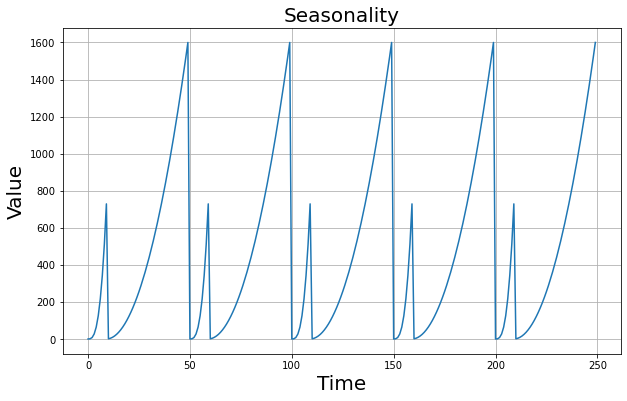

In [4]:
time = np.arange(50)
values = np.where(time < 10, time**3, (time-9)**2)
seasonal = []
for i in range(5):
    for j in range(50):
        seasonal.append(values[j])
# Plot
time_seasonal = np.arange(250)
plot_time_series(time_seasonal, seasonal, label="Seasonality")

In [5]:
pd.DataFrame(seasonal).describe()

,0
count,250.000000
mean,483.300000
std,471.705282
min,0.000000
25%,64.000000
50%,333.500000
75%,784.000000
max,1600.000000


In [6]:
noise = np.random.randn(250)*100

In [7]:
pd.DataFrame(noise).describe()

,0
count,250.000000
mean,-10.848556
std,103.335536
min,-362.586537
25%,-74.895902
50%,-14.016289
75%,55.288297
max,288.224706


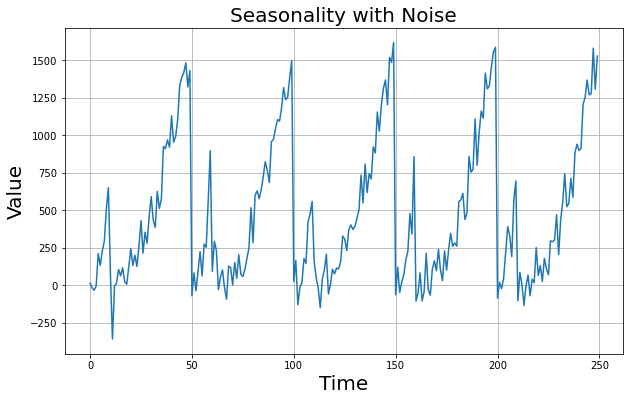

In [8]:
seasonal += noise
time_seasonal = np.arange(250)
plot_time_series(time_seasonal, seasonal, label="Seasonality with Noise")

In [9]:
pd.DataFrame(seasonal).describe()

,0
count,250.000000
mean,472.451444
std,478.303690
min,-358.586537
25%,92.277736
50%,291.998269
75%,804.688614
max,1616.625485


In [10]:
seasonal_data = pd.DataFrame(zip(time_seasonal,seasonal),columns=['Time','Value'])

In [11]:
seasonal_data

,Time,Value
0,0,13.715356
1,1,-17.851650
2,2,-34.134734
3,3,-5.091146
4,4,210.164557
...,...,...
245,245,1267.245367
246,246,1277.363234
247,247,1578.671492
248,248,1305.375750


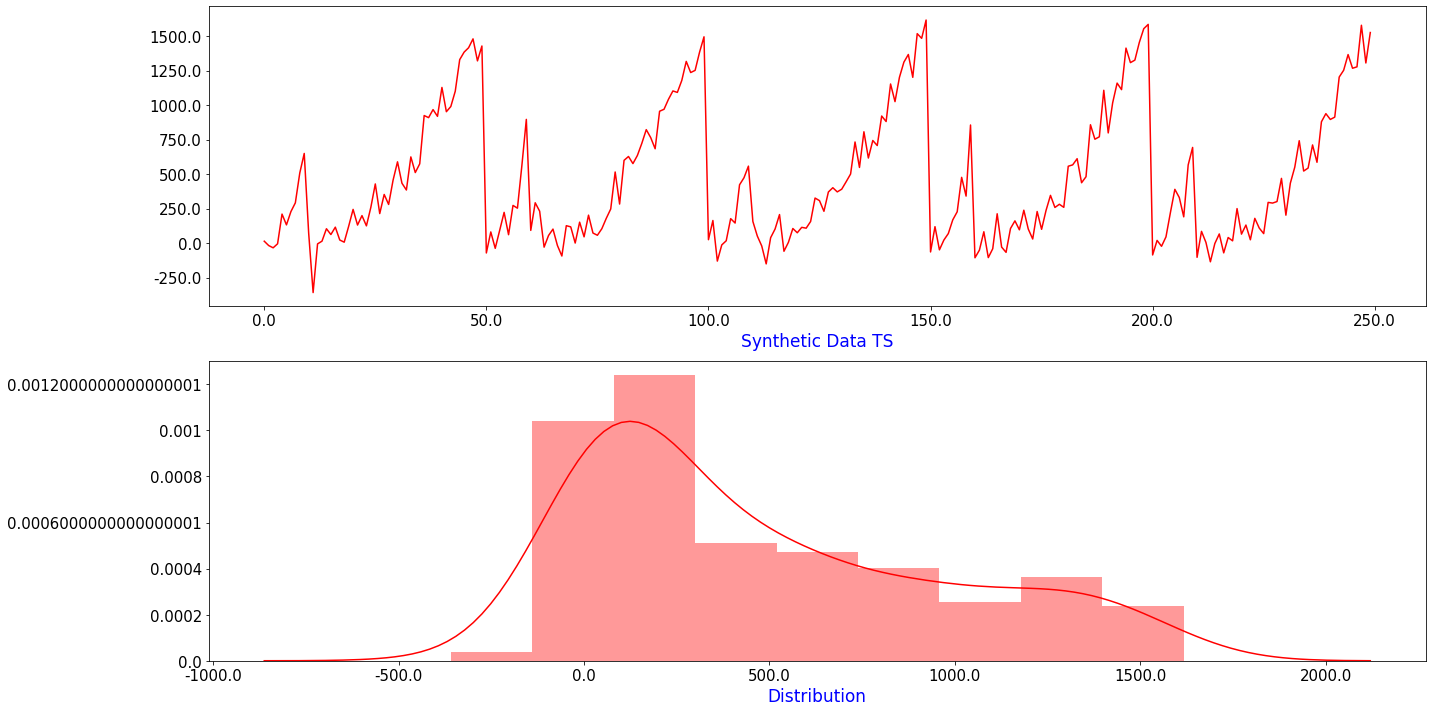

In [12]:
fig,ax = plt.subplots(2,figsize=(20,10))
sns.lineplot(time_seasonal, seasonal,ax=ax[0],color= 'red')
sns.distplot(seasonal_data['Value'],ax=ax[1],color='red')
ax[0].set_xlabel('Synthetic Data TS', fontsize=17,c='blue')
ax[1].set_xlabel('Distribution', fontsize=17,c='blue')
ax[0].set_xticklabels(ax[0].get_xticks(), size = 15)
ax[1].set_xticklabels(ax[1].get_xticks(), size = 15)
ax[0].set_yticklabels(ax[0].get_yticks(), size = 15)
ax[1].set_yticklabels(ax[1].get_yticks(), size = 15)
plt.tight_layout()
plt.show()

In [13]:
seasonal_data.to_csv('SynD_TS.csv')

In [14]:
N = 250
sr = 1
y = np.array(seasonal_data['Value'])
f = fftpack.fftfreq(len(y))
yf = fftpack.fft(y)

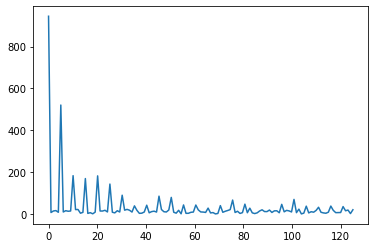

In [15]:
T = 1.0 / N
x = np.linspace(0.0, N*T, N)
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

In [16]:
freq_ampli = pd.DataFrame(zip(np.abs(f[:N//2]),2.0/N * np.abs(yf[:N//2])),columns=['Freq','Ampli'])
freq_ampli

,Freq,Ampli
0,0.000,944.902888
1,0.004,7.340195
2,0.008,14.718690
3,0.012,16.459849
4,0.016,8.353419
...,...,...
120,0.480,35.589608
121,0.484,15.715195
122,0.488,18.982921
123,0.492,2.291602


In [17]:
freq_ampli.to_csv('SynD_FA.csv')

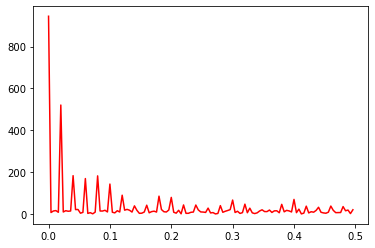

In [18]:
sns.lineplot(np.abs(f[:N//2]),2.0/N * np.abs(yf[:N//2]),color= 'red')

In [19]:
frame_size = 50
Fs = 1
dt = 1/Fs
freq_vector = np.fft.rfftfreq(frame_size, d=dt)

In [20]:
quefrency = np.fft.rfftfreq(np.log(yf).size,freq_vector[1] - freq_vector[0])

In [21]:
cepstrum = np.fft.rfft(np.log(np.abs(yf)))

In [24]:
quefrency[1:]

array([ 0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,
        2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,
        4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,  6.6,
        6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,  8.8,
        9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8, 11. ,
       11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. , 13.2,
       13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2, 15.4,
       15.6, 15.8, 16. , 16.2, 16.4, 16.6, 16.8, 17. , 17.2, 17.4, 17.6,
       17.8, 18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6, 19.8,
       20. , 20.2, 20.4, 20.6, 20.8, 21. , 21.2, 21.4, 21.6, 21.8, 22. ,
       22.2, 22.4, 22.6, 22.8, 23. , 23.2, 23.4, 23.6, 23.8, 24. , 24.2,
       24.4, 24.6, 24.8, 25. ])

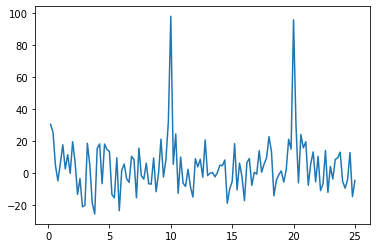

In [25]:
plt.plot(quefrency[1:],cepstrum[1:].real)

In [26]:
cep = pd.DataFrame(zip(quefrency,cepstrum.real),columns=['Quefrency','Cepstrum'])
cep

,Quefrency,Cepstrum
0,0.0,1847.748576
1,0.2,30.561912
2,0.4,25.575506
3,0.6,4.919312
4,0.8,-4.632522
...,...,...
121,24.2,-9.209477
122,24.4,-4.098775
123,24.6,12.995719
124,24.8,-14.485899


In [27]:
cep.to_csv('SynD_Cep.csv')

In [41]:
df = freq_ampli.iloc[1:,:]

In [42]:
df['Freq'] = pd.qcut(df['Freq'],10)

In [43]:
freq_ampli = pd.read_csv('SynD_FA.csv')
freq_ampli

,Unnamed: 0,Freq,Ampli
0,0,0.000,944.902888
1,1,0.004,7.340195
2,2,0.008,14.718690
3,3,0.012,16.459849
4,4,0.016,8.353419
...,...,...,...
120,120,0.480,35.589608
121,121,0.484,15.715195
122,122,0.488,18.982921
123,123,0.492,2.291602


In [44]:
df

,Unnamed: 0,Freq,Ampli
1,1,"(0.003, 0.0532]",7.340195
2,2,"(0.003, 0.0532]",14.718690
3,3,"(0.003, 0.0532]",16.459849
4,4,"(0.003, 0.0532]",8.353419
5,5,"(0.003, 0.0532]",520.727512
...,...,...,...
120,120,"(0.447, 0.496]",35.589608
121,121,"(0.447, 0.496]",15.715195
122,122,"(0.447, 0.496]",18.982921
123,123,"(0.447, 0.496]",2.291602


In [36]:
df1 = cep
df1 = df1.iloc[1:,:]
df1['Quefrency'] = pd.qcut(df1['Quefrency'],10)
df1

,Quefrency,Cepstrum
1,"(0.199, 2.68]",30.561912
2,"(0.199, 2.68]",25.575506
3,"(0.199, 2.68]",4.919312
4,"(0.199, 2.68]",-4.632522
5,"(0.199, 2.68]",6.295263
...,...,...
121,"(22.52, 25.0]",-9.209477
122,"(22.52, 25.0]",-4.098775
123,"(22.52, 25.0]",12.995719
124,"(22.52, 25.0]",-14.485899


In [37]:
cep = pd.read_csv('SynD_Cep.csv')
cep

,Unnamed: 0,Quefrency,Cepstrum
0,0,0.0,1847.748576
1,1,0.2,30.561912
2,2,0.4,25.575506
3,3,0.6,4.919312
4,4,0.8,-4.632522
...,...,...,...
121,121,24.2,-9.209477
122,122,24.4,-4.098775
123,123,24.6,12.995719
124,124,24.8,-14.485899


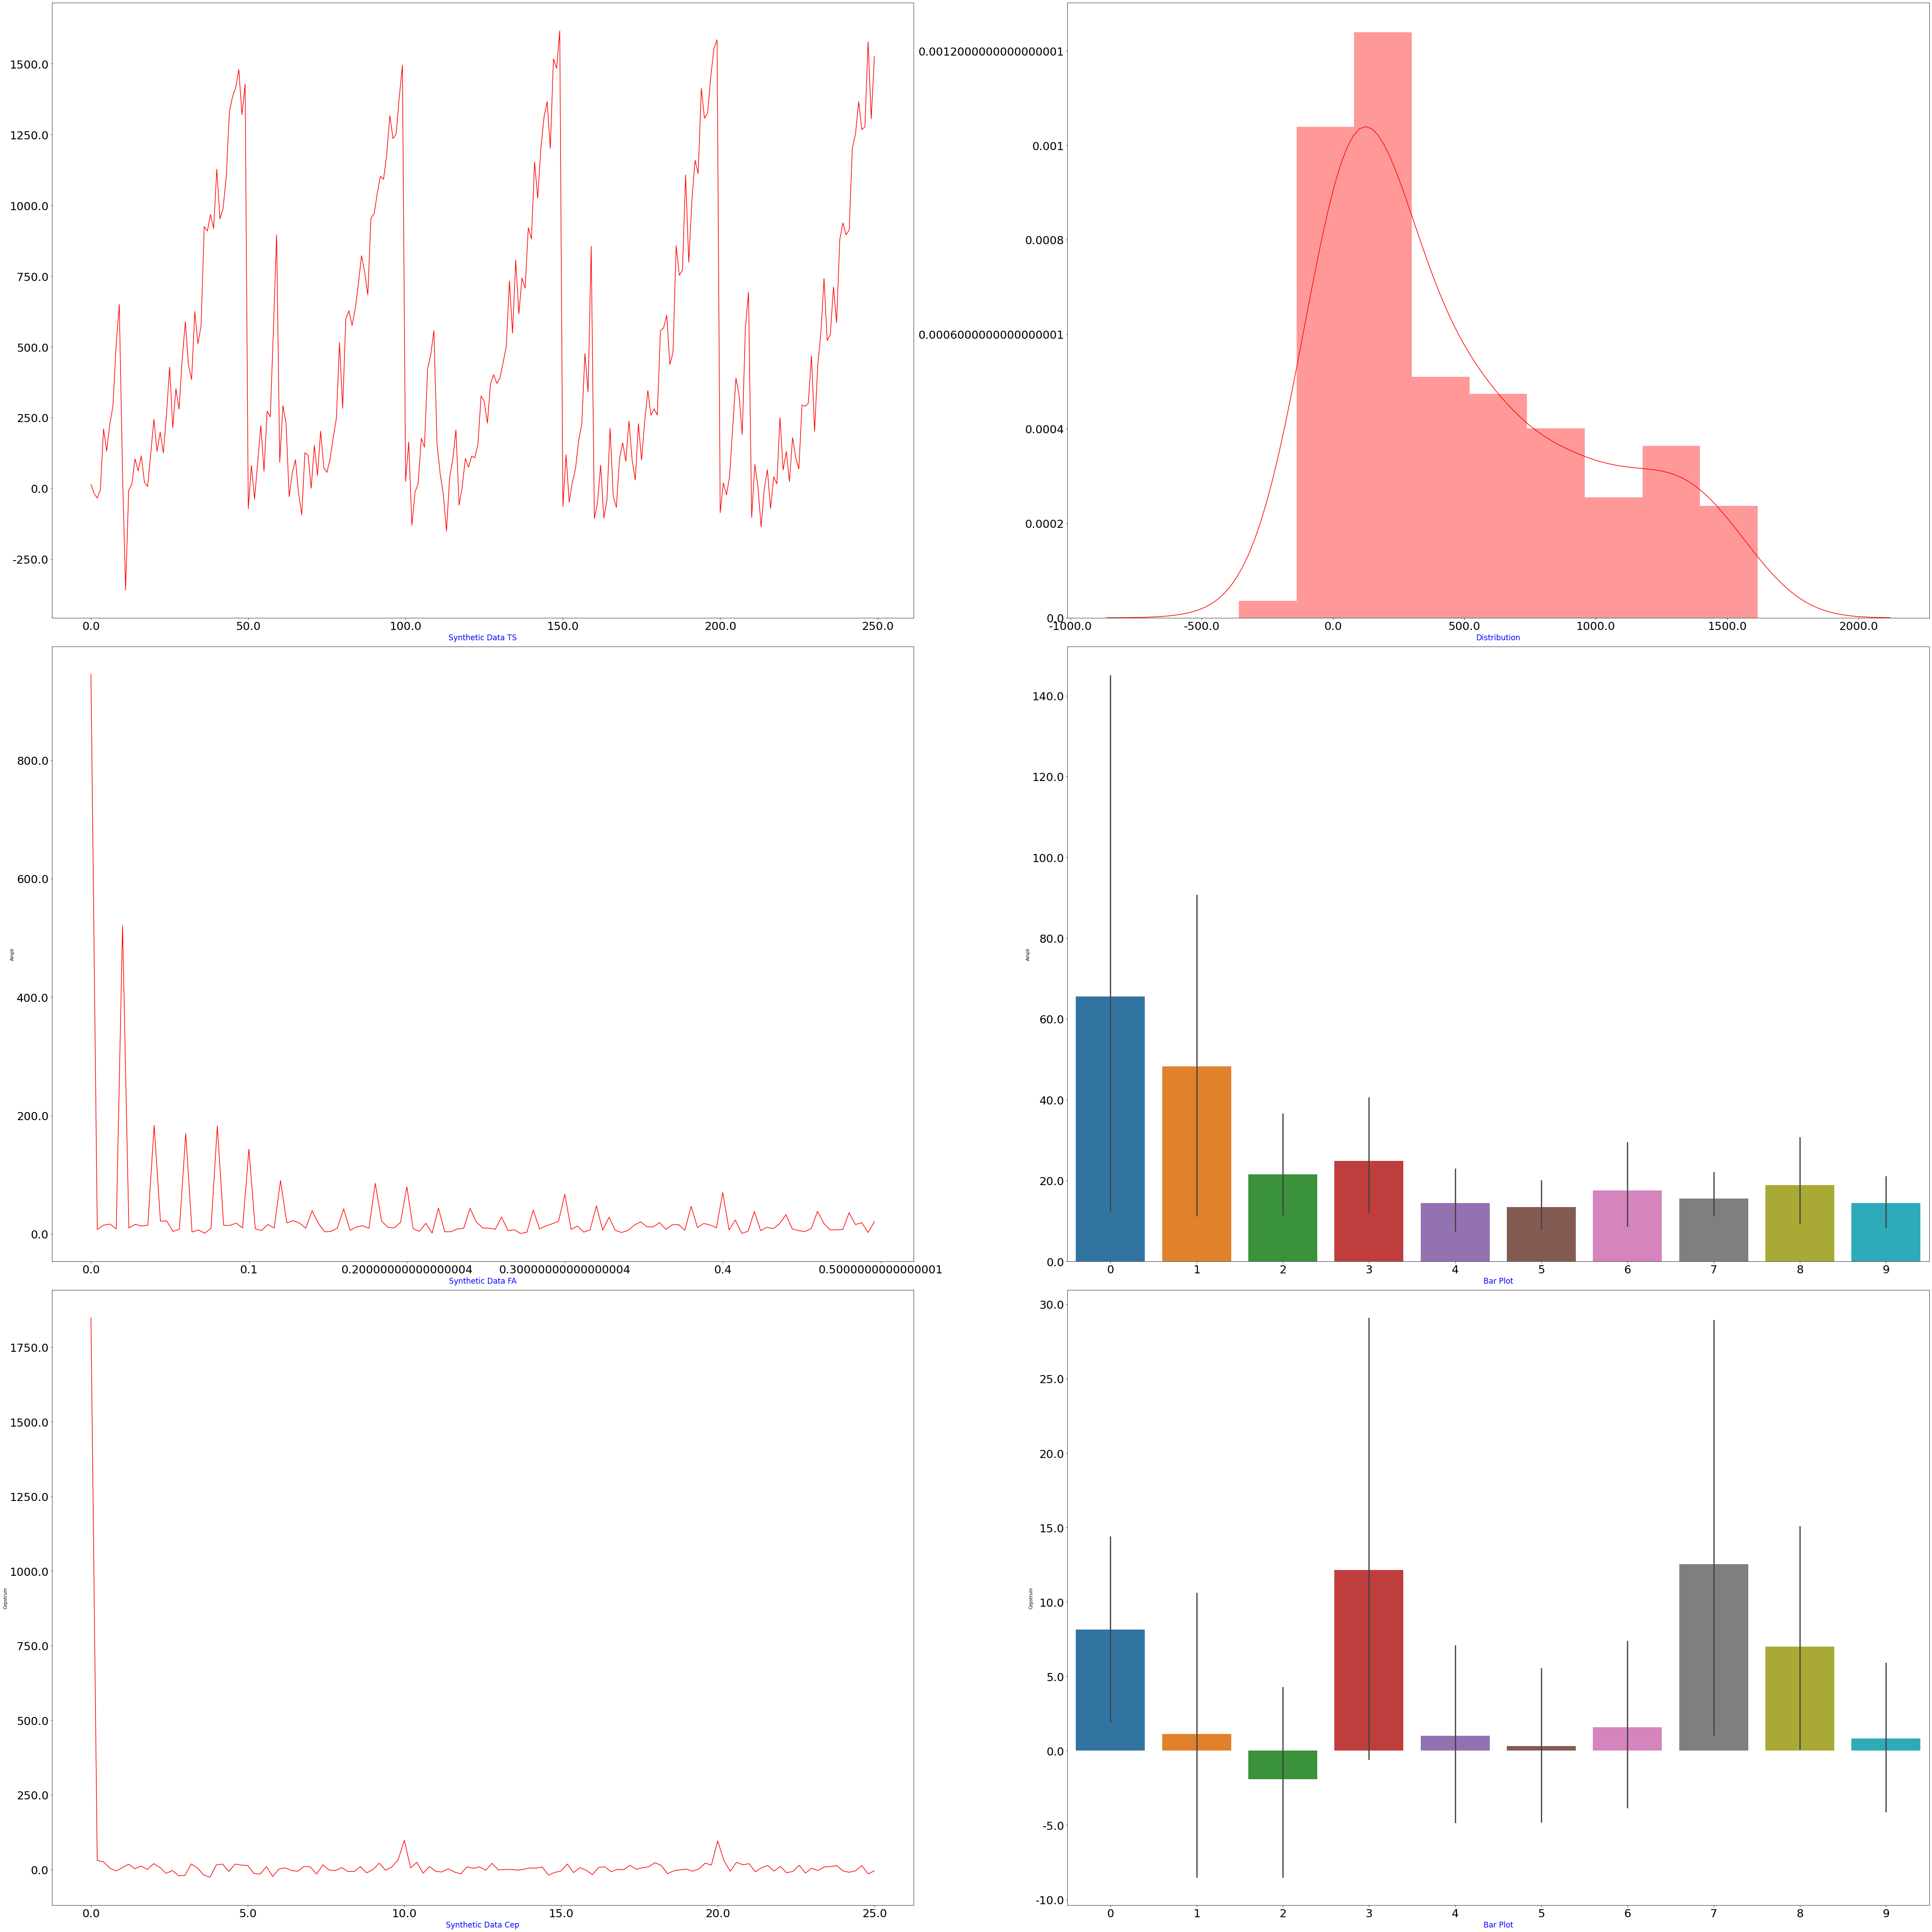

In [48]:
fig,ax = plt.subplots(3,2,figsize=(60,60))
sns.lineplot(time_seasonal, seasonal,ax=ax[0][0],color= 'red')
sns.distplot(seasonal_data['Value'],ax=ax[0][1],color='red')
ax[0][0].set_xlabel('Synthetic Data TS', fontsize=17,c='blue')
ax[0][1].set_xlabel('Distribution', fontsize=17,c='blue')
ax[0][0].set_xticklabels(ax[0][0].get_xticks(), size = 25)
ax[0][1].set_xticklabels(ax[0][1].get_xticks(), size = 25)
ax[0][0].set_yticklabels(ax[0][0].get_yticks(), size = 25)
ax[0][1].set_yticklabels(ax[0][1].get_yticks(), size = 25)

sns.lineplot(freq_ampli['Freq'],freq_ampli['Ampli'],ax=ax[1][0],color= 'red')
sns.barplot(x = df['Freq'], y = df['Ampli'], data = df, ax=ax[1][1])
ax[1][0].set_xlabel('Synthetic Data FA', fontsize=17,c='blue')
ax[1][1].set_xlabel('Bar Plot', fontsize=17,c='blue')
ax[1][0].set_xticklabels(ax[1][0].get_xticks(), size = 25)
ax[1][1].set_xticklabels(ax[1][1].get_xticks(), size = 25)
ax[1][0].set_yticklabels(ax[1][0].get_yticks(), size = 25)
ax[1][1].set_yticklabels(ax[1][1].get_yticks(), size = 25)

sns.lineplot(cep['Quefrency'],cep['Cepstrum'],ax=ax[2][0],color= 'red')
sns.barplot(x = df1['Quefrency'], y = df1['Cepstrum'], data = df1, ax=ax[2][1])
ax[2][0].set_xlabel('Synthetic Data Cep', fontsize=17,c='blue')
ax[2][1].set_xlabel('Bar Plot', fontsize=17,c='blue')
ax[2][0].set_xticklabels(ax[2][0].get_xticks(), size = 25)
ax[2][1].set_xticklabels(ax[2][1].get_xticks(), size = 25)
ax[2][0].set_yticklabels(ax[2][0].get_yticks(), size = 25)
ax[2][1].set_yticklabels(ax[2][1].get_yticks(), size = 25)

plt.tight_layout()
plt.show()